In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import geopandas as gpd
import pandas as pd

In [2]:
#Read in LA neighborhood map
#Retrieved from http://boundaries.latimes.com/set/la-county-neighborhoods-current/
nbd= gpd.read_file("data/la-county-neighborhoods-current_nocatalina.geojson")

In [3]:
def daily_map(mm,dd):
    
    month = str(mm).zfill(2)
    day = str(dd).zfill(2)

    #Read in daily update
    #Retrieved from http://publichealth.lacounty.gov/media/Coronavirus/locations.htm
    dailyrep = pd.read_csv('data/covid_'+month+day+'.csv')

    #Find number under investigation
    underinv = dailyrep[dailyrep['city'].str.contains('Under Investigation')]['count'].item()
    nconfirmed = dailyrep[dailyrep['city'].str.contains('Total')]['count'].item()

    #Add geographic information for neighborhoods
    merged = nbd.set_index('name').join(dailyrep.set_index('city'))
    #merged[:]

    #Plot
#    plt.clf()
    fig, ax = plt.subplots(1,1, figsize=(12, 12))
    nbd.plot(ax=ax, color='white',edgecolor='k', linewidth=0.5)
    divider = make_axes_locatable(ax)
    cax1 = divider.append_axes("right", size="5%", pad=0.05) #cax1 = divider.append_axes("bottom", size="5%", pad=-3)
    merged.plot(column='count', cmap='Reds', ax=ax, cax=cax1, legend=True,edgecolor='k', linewidth=0.4)#legend_kwds={"aspect":"10"})#orientation": "horizontal"})
    ax.axis('off')
    ax.set_title('Confirmed COVID-19 Cases in LA County \n \n '+month+'/'+day+'/2020', fontdict={'fontsize': '20', 'fontweight' : 'demibold'})
    ax.annotate('Total: '+str(nconfirmed),xy=(0.1, .14),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=16, color='k', weight='demibold')
    ax.annotate('Under investigation: '+str(underinv)+' (not shown)',xy=(0.1, .11),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=16, color='k')#, weight='demibold')
    ax.annotate('Source: Los Angeles County Department of Public Health',xy=(0.1, .05),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    fig.savefig('maps/covid_la_'+month+day+'.png',dpi=300, bbox_inches = 'tight')

    return

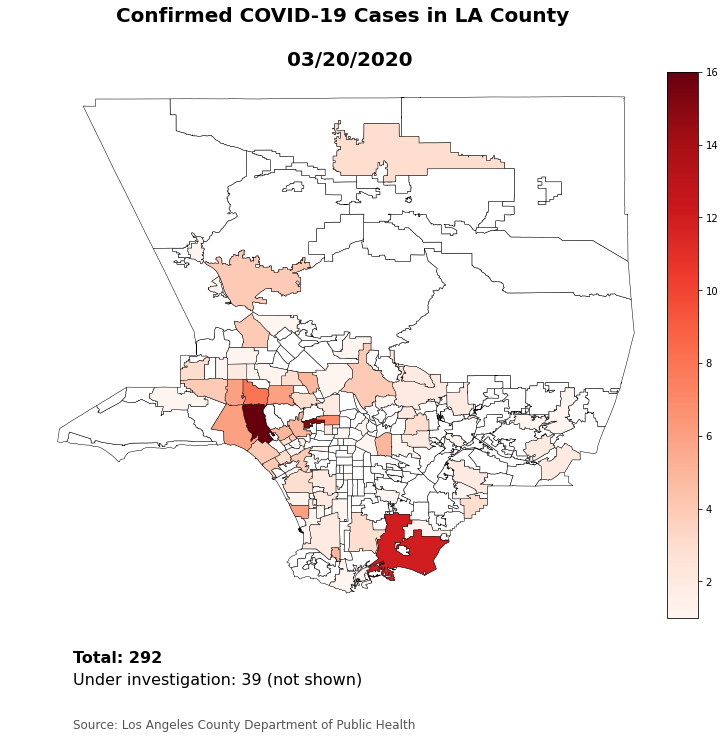

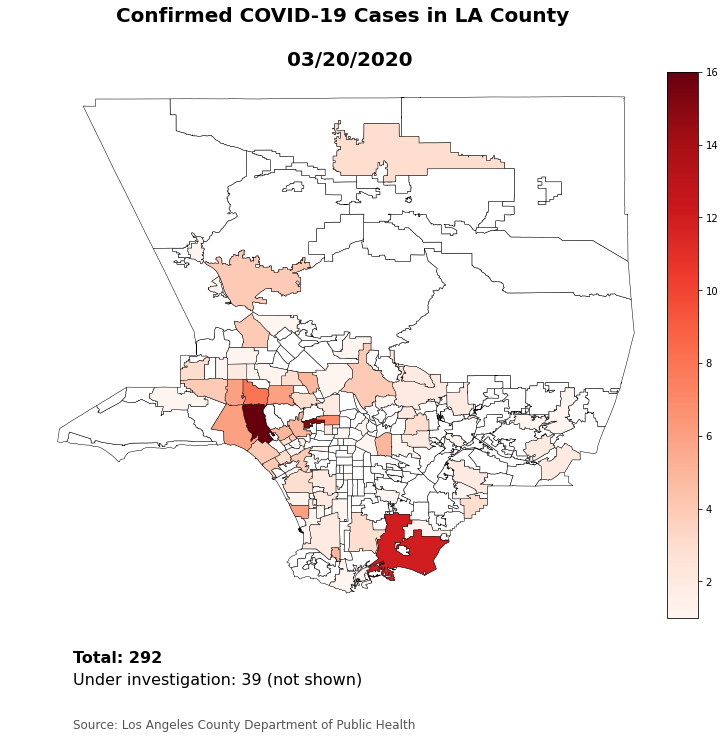

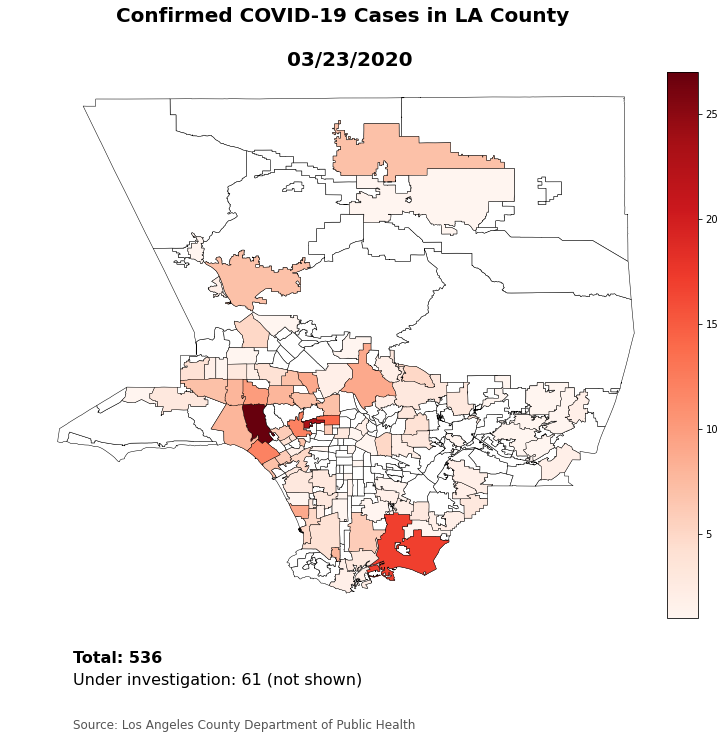

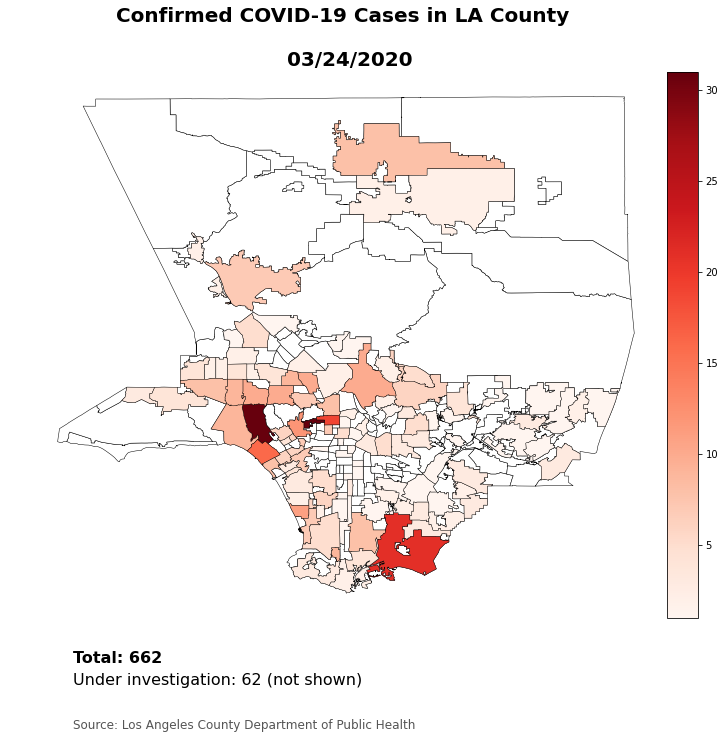

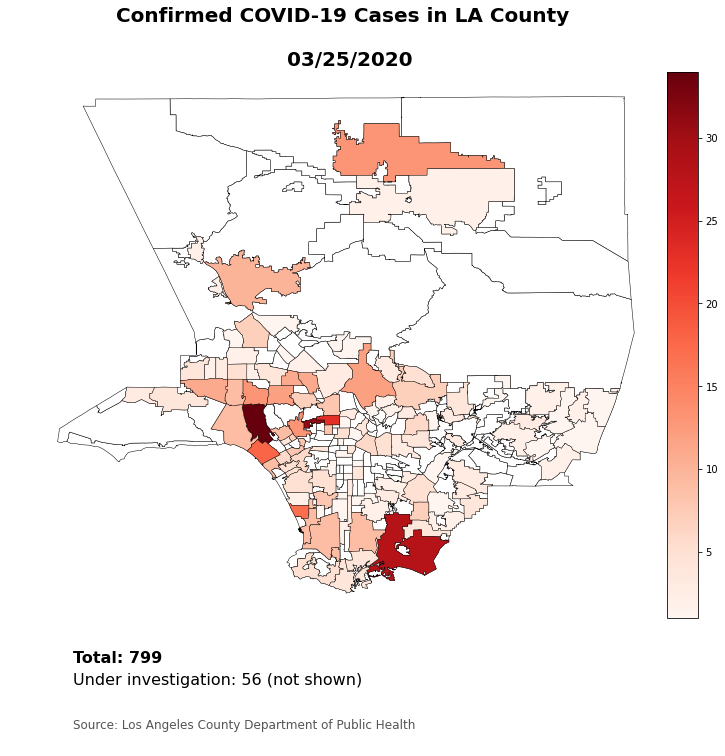

In [4]:
#Create plots for the specified days
month = 3
days = [20, 20, 23, 24, 25]

for day in days:
    daily_map(month,day)

To create an animated gif, use imagemagick locally.  Currently using:

convert -delay 90 -loop 0 *png covid_la.gif


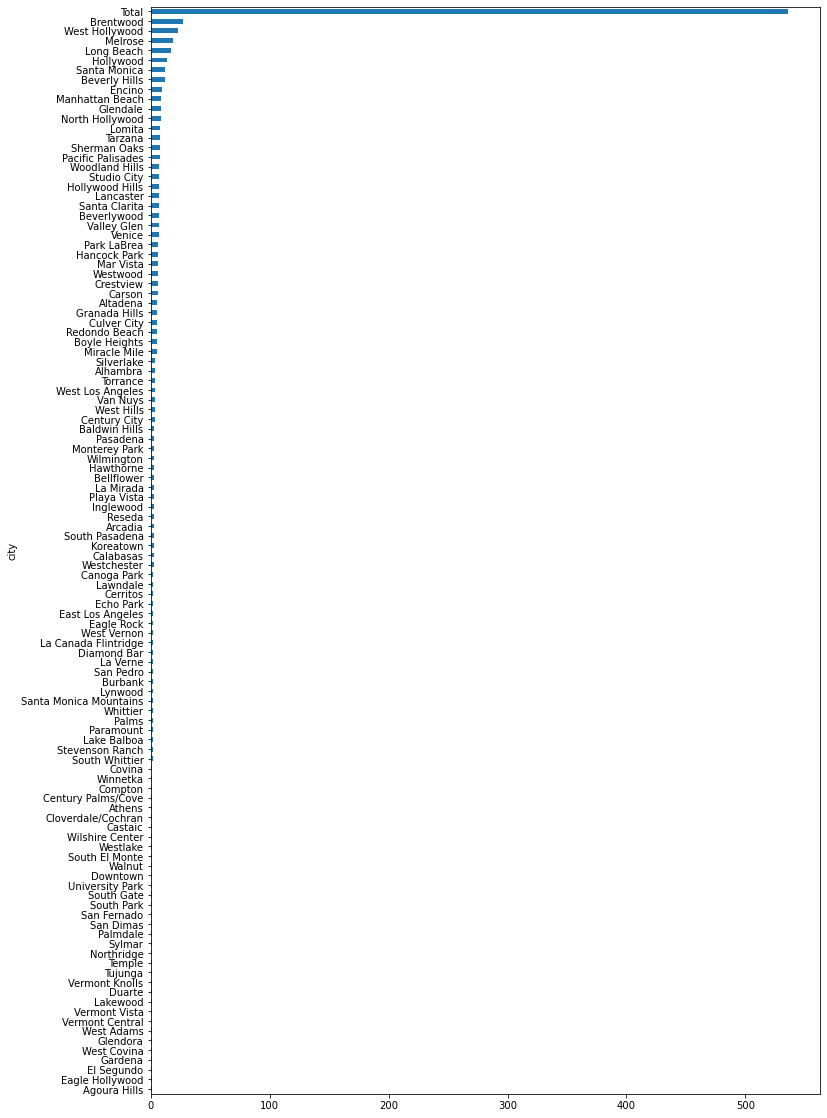

In [5]:
#Test out plotting a barchart
fig, ax = plt.subplots(1,1, figsize=(12, 20))
df = pd.read_csv('data/covid_0323.csv')
df.set_index('city', inplace=True, drop=True)
df.drop(['Under Investigation']).sort_values(by=['count'],ascending=1).plot(kind='barh', ax=ax, legend=False)